In [1]:
import pandas as pd
import numpy as np
import gpflow
import matplotlib.pyplot as plt


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from statsmodels.tsa.ar_model import AR

In [5]:
crashes = pd.read_csv('../data/gp_grid_parkslope.csv')
crashes.head()

,Unnamed: 0,DATETIME,GRID_SQUARE,COUNT,x_point,y_point,DATE_IND
0,0,2013-05-31,1,0.0,985568.510491,188005.99248,1
1,48,2013-06-30,1,0.0,985568.510491,188005.99248,2
2,96,2013-07-31,1,0.0,985568.510491,188005.99248,3
3,144,2013-08-31,1,0.0,985568.510491,188005.99248,4
4,192,2013-09-30,1,0.0,985568.510491,188005.99248,5


In [49]:
ts = crashes.groupby('DATETIME')[['COUNT']].sum()
ts.index = ts.index.to_datetime()

train = ts.loc['2015-03-31':'2017-04-30']

test  = ts.loc['2017-04-30':]


//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  from ipykernel import kernelapp as app


In [48]:
ar = AR(endog= train.COUNT )
ar_fit = ar.fit(maxlag=1)

//anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


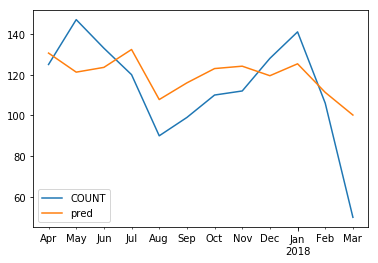

In [60]:
pred = ar.predict(params= ar_fit.params, end=12)

test['pred'] = pred

test.plot()

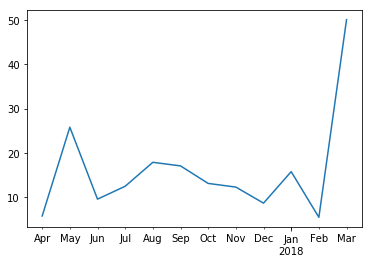

In [64]:
np.sqrt(np.square(test.pred - test.COUNT)).plot()